In [66]:
#Libraries
import numpy as np
import pandas as pd 
import seaborn as sns 
import tensorflow as tf
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor
from argparse import Namespace
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression 
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score, f1_score, precision_score
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
import missingno as msno 
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from keras import callbacks
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn import ensemble
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, auc, roc_curve, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report 
from sklearn.model_selection import cross_val_score
from matplotlib.legend_handler import HandlerLine2D
from warnings import filterwarnings
filterwarnings('ignore')

In [67]:
data = pd.read_csv('heart_failure_clinical_records_dataset.csv')
df = data.copy()
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [68]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [69]:
df.describe().T 

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


In [70]:
counts=df['DEATH_EVENT'].value_counts()
counts

0    203
1     96
Name: DEATH_EVENT, dtype: int64

In [71]:
counts[1] / counts[0] 

0.4729064039408867

In [72]:
heart_died = df[df['DEATH_EVENT'] == 1]
heart_lived = df[df['DEATH_EVENT'] == 0]

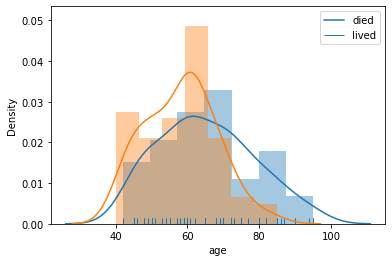

In [73]:
sns.distplot(heart_died['age'],rug=True)
sns.distplot(heart_lived['age'].sample(96))

plt.legend(['died', 'lived'])


* When we look at the graph above, we see that the distribution is normal but slightly skewed to the right. We need to standardize and scale
.

### Visualizing

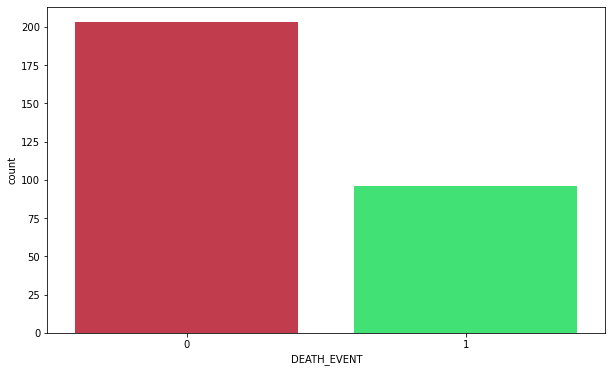

In [76]:
plt.figure(figsize=(10,6))
sns.countplot(df.DEATH_EVENT,palette=['#D7263D','#27FB6B'])
plt.show()

In [77]:
print((df.DEATH_EVENT==1).sum())

96


In [78]:
print((df.DEATH_EVENT==0).sum())

203


Text(0.5, 0.98, 'Distribution by Categorical')

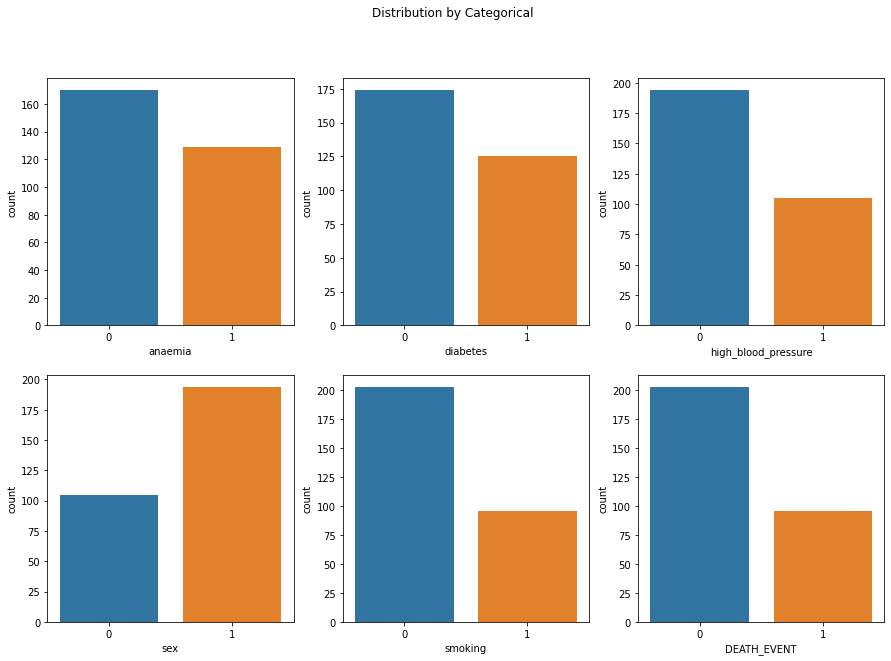

In [79]:
fig,ax=plt.subplots(2,3,figsize=(15,10),)
sns.countplot(x=df.anaemia,ax=ax[0,0])
sns.countplot(x=df.diabetes,ax=ax[0,1])
sns.countplot(x=df.high_blood_pressure,ax=ax[0,2])
sns.countplot(x=df.sex,ax=ax[1,0])
sns.countplot(x=df.smoking,ax=ax[1,1])
sns.countplot(x=df.DEATH_EVENT,ax=ax[1,2])
plt.suptitle("Distribution by Categorical")

Text(0.5, 0.98, 'Death Event distribution according to age and gender')

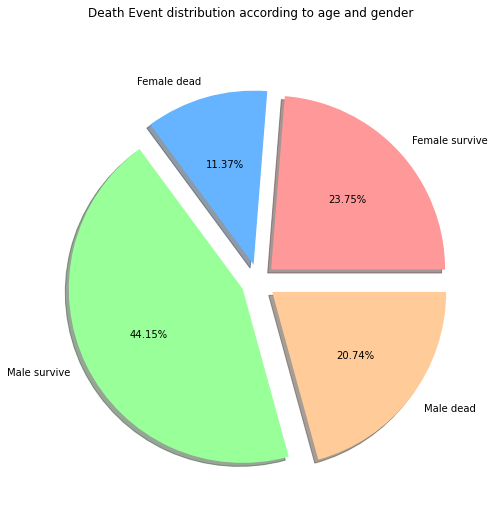

In [101]:
female_survive=df.age[(df.sex==0) & (df.DEATH_EVENT==0)].count()
male_survive=df.age[(df.sex==1) & (df.DEATH_EVENT==0)].count()
female_dead=df.age[(df.sex==0) & (df.DEATH_EVENT==1)].count()
male_dead=df.age[(df.sex==1) & (df.DEATH_EVENT==1)].count()


data=[female_survive,female_dead,male_survive,male_dead]
label=["Female survive","Female dead","Male survive","Male dead"]
explde=[0.1,0.1,0.1,0.1]
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
plt.figure(figsize=(8,8))
plt.pie(x=data,labels=label,autopct="%1.2f%%",shadow=True,explode=explde,colors=colors)
plt.suptitle("Death Event distribution according to age and gender")

<AxesSubplot:xlabel='time', ylabel='age'>

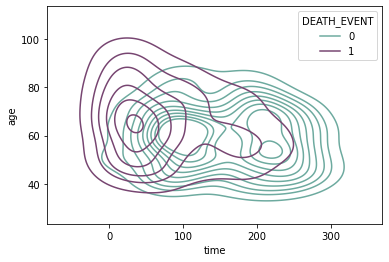

In [81]:
cols= ["#6daa9f","#774571"]
sns.kdeplot(x=df["time"], y=df["age"], hue =df["DEATH_EVENT"], palette=cols)

### Correlation Matrix 

In [82]:
corr = df.corr() #correlation matrix to examinination.
corr  

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


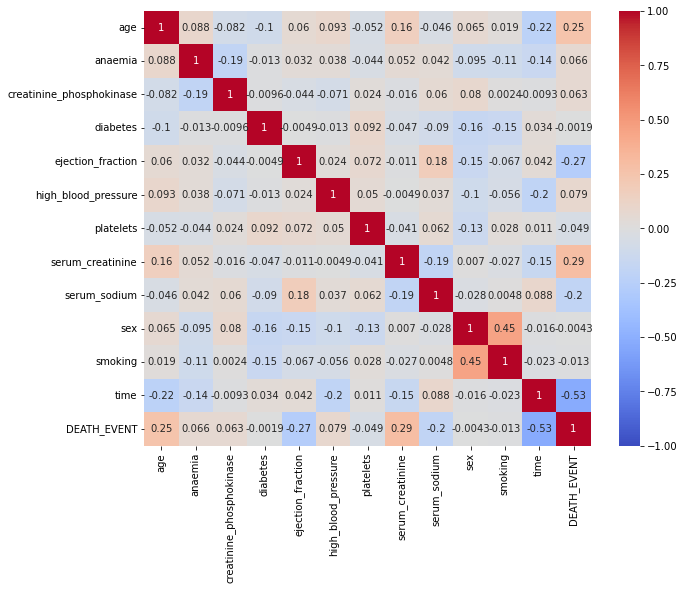

In [83]:
ax , fig  = plt.subplots(figsize =(10 , 8 ))
sns.heatmap(corr ,vmin = -1 , cmap='coolwarm', annot = True,xticklabels=corr.columns.values,yticklabels=corr.columns.values)
plt.show()

The patient's time for illness is very important, as initial diagnosis and treatment reduce the likelihood of any death. They are inversely related and there is a strong relationship between them.
Ejection fraction is the second most important feature. Since it is the main activity of the heart, it is expected to have a high relationship.
The patient's age is the third feature with the strongest association, as the heart slows down with aging.


### Checking for Missing Values

<AxesSubplot:>

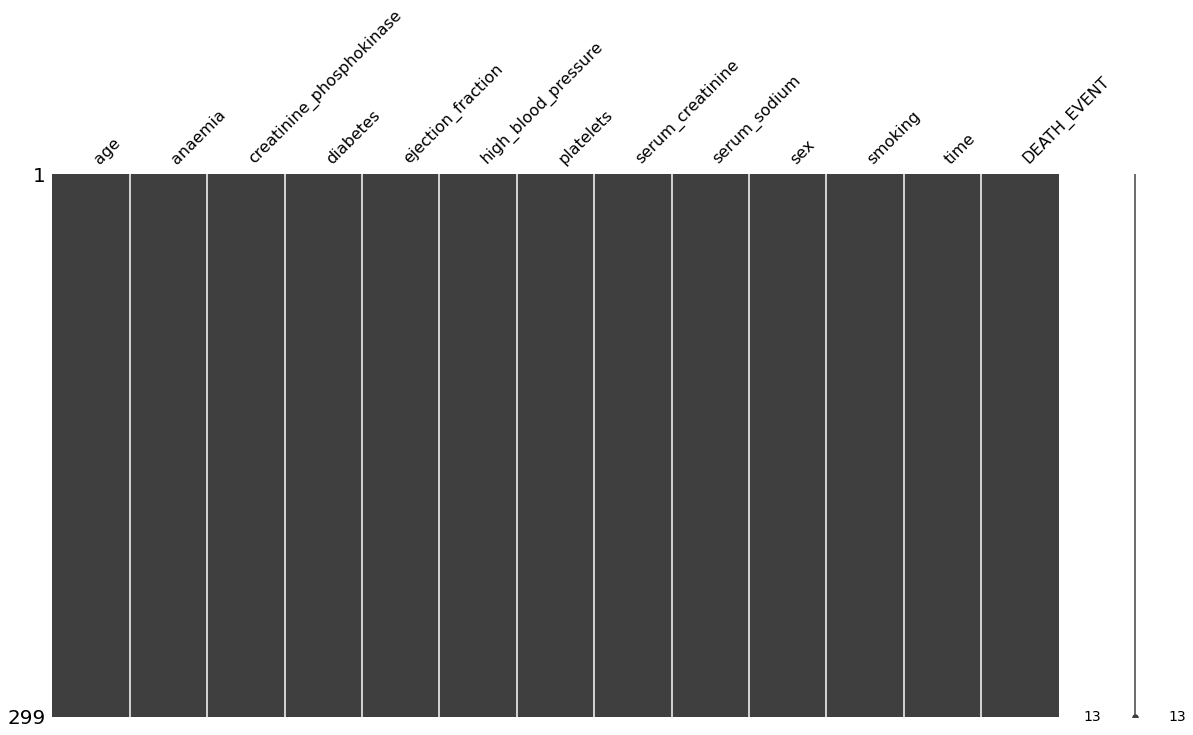

In [84]:
msno.matrix(df,figsize=(20, 10))

In [85]:
df.isnull().any()

age                         False
anaemia                     False
creatinine_phosphokinase    False
diabetes                    False
ejection_fraction           False
high_blood_pressure         False
platelets                   False
serum_creatinine            False
serum_sodium                False
sex                         False
smoking                     False
time                        False
DEATH_EVENT                 False
dtype: bool

### Data Preprocessing

In [86]:
# Let's assign x and y values.
X=df.drop(["DEATH_EVENT"],axis=1)
y=df["DEATH_EVENT"]

In [87]:
X

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280


In [88]:
y

0      1
1      1
2      1
3      1
4      1
      ..
294    0
295    0
296    0
297    0
298    0
Name: DEATH_EVENT, Length: 299, dtype: int64

* **Normalisation**
  * In order to increase the success rate, we need to use the normalized versions of the data. This process is called "Feature Scaling"..

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
from sklearn.preprocessing import StandardScaler

We spiting data to 20% of the data for testing. The remaining 80%  for training data.

In [90]:
#standardization process for both the test dataset and the train dataset.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [91]:
X_test[0:5]

array([[ 7.46626996e-01, -8.77707451e-01,  5.20270419e-03,
        -8.26497787e-01,  1.49345268e-01, -7.36162675e-01,
        -2.24743345e+00,  1.32203359e+00, -9.44310219e-02,
         7.42932064e-01,  1.47873820e+00,  1.50540721e+00],
       [-9.23674793e-01,  1.13933179e+00, -2.95340912e-01,
        -8.26497787e-01, -2.80697130e-01, -7.36162675e-01,
         1.05843720e+00, -4.90853221e-01,  8.08329548e-01,
         7.42932064e-01,  1.47873820e+00,  1.37750834e+00],
       [-1.34125024e+00, -8.77707451e-01,  1.97355174e+00,
         1.20992460e+00, -7.10739527e-01, -7.36162675e-01,
         7.60802546e-01, -2.89421353e-01,  5.82639405e-01,
         7.42932064e-01, -6.76252226e-01, -4.21691686e-02],
       [ 1.58177789e+00,  1.13933179e+00, -4.80535042e-01,
        -8.26497787e-01, -2.80697130e-01,  1.35839541e+00,
         1.33481224e+00,  8.07000115e+00, -7.71501449e-01,
         7.42932064e-01,  1.47873820e+00, -1.56416577e+00],
       [-1.59179551e+00, -8.77707451e-01, -5.0275833

In [100]:
ann = tf.keras.models.Sequential()

# add the input layer and the first hidden layer.
ann.add(tf.keras.layers.Dense(units=12, activation='relu', input_shape=X_train[0].shape))

# add the second hidden layer.
ann.add(tf.keras.layers.Dense(units=8, activation='relu'))

# add the output layer.
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

* Training of ANN
   * **optimizer**: "man" showing Stochastic Gradient Descent.
   * **loss**: The loss function to be used for optimization of SGD. It calculates between the estimate y and the actual ye value and finds the most optimal value for SGD..
   * Since our target variable number is 2, we used  **binary_crossentropy** If the number of target variables was more than 2, we would use categorical_crossentropy.

In [93]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Calculation of the number of parameters that need to be learned:

  * Total number of parameters to learn=[Input layer x Hidden Layer]+ [Hidden Layer x OutputLayer] + Number of Neurons (Excluding Input Layer)

  * From here;
  
    Total number of parameters to learn = [12 x 12] + [12 x 8] + [8 x 1] + 12 + 8 + 1 = 269

In [94]:
ann.summary() # summary of our model.
# When we look at the total params part, we see the value of 269. From here; We conclude that the number of parameters we calculated above is correct

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 12)                156       
                                                                 
 dense_7 (Dense)             (None, 8)                 104       
                                                                 
 dense_8 (Dense)             (None, 1)                 9         
                                                                 
Total params: 269
Trainable params: 269
Non-trainable params: 0
_________________________________________________________________


* Calculation of the number of parameters:
  * **Epoch**: The number of rounds to show all training data during training.
  * **Batch_size**: The number of data that the model will train simultaneously.

In [95]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 150)

Epoch 1/150
8/8 [==============================] - 0s 2ms/step - loss: 0.6317 - accuracy: 0.6904
Epoch 2/150
8/8 [==============================] - 0s 2ms/step - loss: 0.6178 - accuracy: 0.6946
Epoch 3/150
8/8 [==============================] - 0s 2ms/step - loss: 0.6040 - accuracy: 0.6987
Epoch 4/150
8/8 [==============================] - 0s 2ms/step - loss: 0.5919 - accuracy: 0.6987
Epoch 5/150
8/8 [==============================] - 0s 2ms/step - loss: 0.5797 - accuracy: 0.6987
Epoch 6/150
8/8 [==============================] - 0s 3ms/step - loss: 0.5681 - accuracy: 0.6987
Epoch 7/150
8/8 [==============================] - 0s 2ms/step - loss: 0.5574 - accuracy: 0.6987
Epoch 8/150
8/8 [==============================] - 0s 2ms/step - loss: 0.5465 - accuracy: 0.7029
Epoch 9/150
8/8 [==============================] - 0s 2ms/step - loss: 0.5359 - accuracy: 0.7029
Epoch 10/150
8/8 [==============================] - 0s 2ms/step - loss: 0.5263 - accuracy: 0.7029
Epoch 11/150
8/8 [===========

8/8 [==============================] - 0s 2ms/step - loss: 0.2720 - accuracy: 0.8787
Epoch 85/150
8/8 [==============================] - 0s 2ms/step - loss: 0.2704 - accuracy: 0.8787
Epoch 86/150
8/8 [==============================] - 0s 2ms/step - loss: 0.2685 - accuracy: 0.8787
Epoch 87/150
8/8 [==============================] - 0s 2ms/step - loss: 0.2677 - accuracy: 0.8787
Epoch 88/150
8/8 [==============================] - 0s 2ms/step - loss: 0.2661 - accuracy: 0.8787
Epoch 89/150
8/8 [==============================] - 0s 2ms/step - loss: 0.2645 - accuracy: 0.8787
Epoch 90/150
8/8 [==============================] - 0s 2ms/step - loss: 0.2632 - accuracy: 0.8828
Epoch 91/150
8/8 [==============================] - 0s 2ms/step - loss: 0.2615 - accuracy: 0.8870
Epoch 92/150
8/8 [==============================] - 0s 2ms/step - loss: 0.2603 - accuracy: 0.8870
Epoch 93/150
8/8 [==============================] - 0s 2ms/step - loss: 0.2586 - accuracy: 0.8870
Epoch 94/150
8/8 [===============

* Test Example
   * age --> 75
   * anaemia --> 0
   * creatinine_phosphokinase --> 580
   * diabetes --> 0
   * ejection_fraction --> 20
   * high_blood_pressure --> 1
   * platelets --> 26500
   * serum_creatinine --> 1.9
   * serum_sodium --> 130
   * sex --> 1
   * smoking --> 0
   * time --> 4

In [96]:
# 
print(ann.predict(scaler.transform([[75,0, 580, 0, 20, 1, 265000, 1.9, 130, 1,0,4]])))

[[0.98223627]]


In [97]:

y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.2)
pd.DataFrame(list(zip(y_test, y_pred)), columns=['Actual', 'Predicted'])

,Actual,Predicted
0,0,[False]
1,0,[False]
2,1,[True]
3,1,[True]
4,0,[True]
5,0,[False]
6,1,[True]
7,0,[True]
8,1,[True]
9,0,[False]


In [99]:
from sklearn.metrics import confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[26  9]
 [ 7 18]]
0.7333333333333333
